<a href="https://colab.research.google.com/github/KetakiN/Relax-inc./blob/main/Relax_nagarkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The  data  is  available  as  two  attached  CSV  files:
takehome_user_engagement. csv
takehome_users . csv
The  data  has  the  following  two  tables:
1]  A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the
product  in  the  last  two  years.   This  table  includes:
● name:  the  user's  name
● object_id:   the  user's  id
● email:  email  address
● creation_source:   how  their  account  was  created.  This  takes  on  one
of  5  values:
○ PERSONAL_PROJECTS:  invited  to  join  another  user's
personal  workspace
○ GUEST_INVITE:  invited  to  an  organization  as  a  guest
(limited  permissions)
○ ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
○ SIGNUP:  signed  up  via  the  website
○ SIGNUP_GOOGLE_AUTH:  signed  up  using  Google
Authentication  (using  a  Google  email  account  for  their  login
id)
● creation_time:  when  they  created  their  account
● last_session_creation_time:   unix  timestamp  of  last  login
● opted_in_to_mailing_list:  whether  they  have  opted  into  receiving
marketing  emails
● enabled_for_marketing_drip:  whether  they  are  on  the  regular
marketing  email  drip
● org_id:   the  organization  (group  of  users)  they  belong  to
● invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).
2]  A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day
that  a  user  logged  into  the  product.Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption .
We  suggest  spending  1­-2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable

In [20]:
df_eng=pd.read_csv('/content/sample_data/takehome_user_engagement.csv')

In [21]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [22]:
df_eng.shape

(207917, 3)

In [55]:
df_user=pd.read_csv('/content/sample_data/takehome_users.csv',encoding='ISO-8859-1')

In [56]:
df_user.shape

(12000, 10)

In [57]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [58]:
df_user.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

from above we can determine that 3177 users have been created but did not login into a session after creation

# from the above  two table we can assume that the object_id is same as user_id

In [ ]:
#an "adopted user" is a user who has logged into the product on three separate days in at least one seven­day period ,
# identify which factors predict future user adoption . 
# one task is to identify which user(based on id) has had three or more logins in 3 seperate days, and is within a 7 day period
# another task is to combine information from both the tables to able to draw predictions

In [23]:
df_eng['time_stamp']=pd.to_datetime(df_eng['time_stamp'])

In [24]:
# since we will oly consider logins on sepreate days, we will remove any duplicate logins on the same day for a user
df_eng['time_stamp'] = df_eng['time_stamp'].dt.floor('d')
#sorting and remove duplicated days per users 
df_eng = df_eng.sort_values(['user_id', 'time_stamp']).drop_duplicates()

In [25]:
# lets take a look
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22,1,1
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1


In [26]:
df_eng.shape

(207917, 3)

In [27]:
df_eng.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

it appears that there are no duplicates of days with same user id

In [31]:
# next we will check for users by number of logins in a 7 day period 
def count_within(df, period):
    return df.rolling(period, on='time_stamp')['user_id'].count()

df_eng['count_in_seven'] = df_eng.groupby('user_id',as_index=False, group_keys=False).apply(count_within, '7D')

In [41]:
df_max_eng=df_eng.groupby('user_id')['count_in_seven'].max().reset_index()

In [42]:
df_max_eng.head()

,user_id,count_in_seven
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0


In [46]:
df_max_eng.user_id

0           1
1           2
2           3
3           4
4           5
        ...  
8818    11996
8819    11997
8820    11998
8821    11999
8822    12000
Name: user_id, Length: 8823, dtype: int64

In [45]:
df_user.shape

(12000, 10)

In [47]:
# check for duplicate user entries in the df_user table
df_user.object_id

0            1
1            2
2            3
3            4
4            5
         ...  
11995    11996
11996    11997
11997    11998
11998    11999
11999    12000
Name: object_id, Length: 12000, dtype: int64

In [48]:
# it appears that there are more id's in the df_user table than in the engagement table, this may be that some users joined th esytem but never logged in
# we will join the two tables on thier ids
df_user.rename(columns = {'object_id':'user_id'}, inplace = True)

In [49]:
df_user.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [54]:
df_user.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [50]:
df_max_eng.columns

Index(['user_id', 'count_in_seven'], dtype='object')

In [51]:
df = df_user.merge(df_max_eng, how = 'left',on = 'user_id',sort = True)

In [52]:
df.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'count_in_seven'],
      dtype='object')

In [53]:
df.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
count_in_seven                3177
dtype: int64

In [59]:
df.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
count_in_seven                float64
dtype: object

In [60]:
# will will replace the NaN in last_session_creation_time and count_in_seven with 0 to indidcate that no sessions were not logged in after user creation
df['last_session_creation_time']=df['last_session_creation_time'].fillna(0)
df['count_in_seven']=df['count_in_seven'].fillna(0)
# replace NaN in invited_by_user_id with 0
df['invited_by_user_id']=df['invited_by_user_id'].fillna(0)

In [61]:
df.isnull().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
count_in_seven                0
dtype: int64

In [62]:
# next seperate out the users who have logins that are 3 or greater in the 7 day period
df['adopted']=(df['count_in_seven']>2).astype('int')

In [64]:
df['count']=1

In [69]:
from google.colab import files

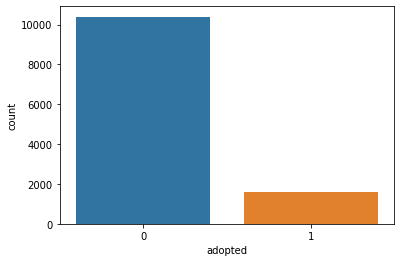

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# now lets take a look to see how many users are adopted from the total users created
adopted_users=df.groupby('adopted')['count'].sum().reset_index()
sns.barplot(x='adopted',y='count',data=adopted_users)
plt.savefig('adopted_users.png',bbox_inches='tight')
plt.show()
files.download('adopted_users.png')

In [71]:
# looks like a very small fraction
adopted_users.head()

,adopted,count
0,0,10398
1,1,1602


In [72]:
percent_adopted=round((1062/12000)*100)
print('percent of adopted users from total created: {}%'.format(percent_adopted))

percent of adopted users from total created: 9%


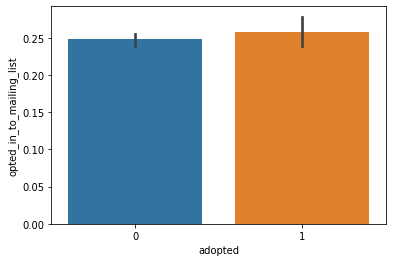

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
sns.barplot(y='opted_in_to_mailing_list',x='adopted',data=df)
plt.savefig('opted_in_users.png',bbox_inches='tight')
plt.show()
files.download('opted_in_users.png')

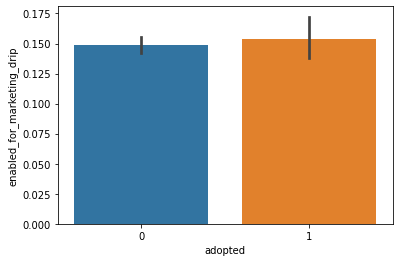

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
sns.barplot(y='enabled_for_marketing_drip',x='adopted',data=df)
plt.savefig('marketing_email_users.png',bbox_inches='tight')
plt.show()
files.download('marketing_email_users.png')

In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, f1_score,roc_auc_score

In [83]:
df.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'count_in_seven', 'adopted', 'count'],
      dtype='object')

In [84]:
X=df.drop(['count_in_seven', 'adopted', 'count'],axis=1)

In [85]:
y=df['adopted']

In [86]:
X=pd.get_dummies(X, drop_first=True)

In [89]:
model=XGBClassifier()

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=23)

In [93]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



In [94]:
#predict probabilities
yhat=model.predict_proba(X_test)

In [95]:
# Best threshold based on f1 score for positive class
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
 
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
# Best threshold for f1 score: THRESHOLD
THRESHOLD=thresholds[ix]
#Calculate predcitions on best threshold
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), roc_auc_score(y_test, preds)], index=["accuracy", "roc_auc_score"])

Threshold=0.248, F-Score=0.70525


,0
accuracy,0.916414
roc_auc_score,0.837185


In [96]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3416
           1       0.68      0.73      0.71       544

    accuracy                           0.92      3960
   macro avg       0.82      0.84      0.83      3960
weighted avg       0.92      0.92      0.92      3960



In [98]:
from sklearn.metrics import roc_curve

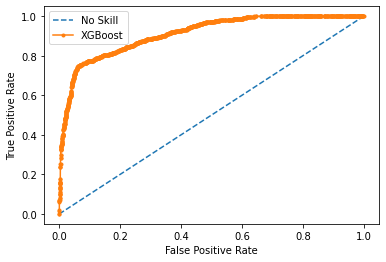

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
#plot the ROC
from matplotlib import pyplot
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='XGBoost')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.savefig('ROC_relax.png',bbox_inches='tight')
pyplot.show()
files.download('ROC_relax.png')

30


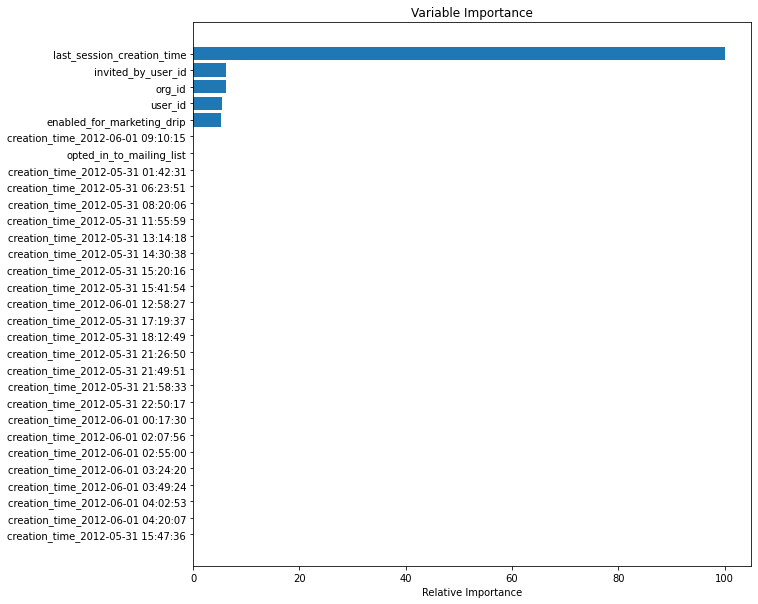

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
# Look at feature importance based on the random forest classifier
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('variable_importance.png',bbox_inches='tight')
plt.show()
files.download('variable_importance.png')